# 📊 House Price Analysis - Bangalore

## **Objective**
- Perform **Exploratory Data Analysis (EDA)**
- Detect & Remove **Outliers** (Mean/Std Dev, Percentile, IQR, Z-Score)
- Visualize **Boxplots & Histograms**
- Check **Normality (Skewness & Kurtosis)** & Apply Transformations
- Analyze **Correlation (Heatmap & Scatterplots)**

### **Dataset**
Download: [House Price Dataset](https://drive.google.com/file/d/1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P/view?usp=sharing)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore

df = pd.read_csv('house_price.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


## 🔍 **Q1: Basic EDA**

In [3]:
# Check basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## 🔎 **Q2: Detect & Remove Outliers**

In [4]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
lower_limit, upper_limit = mean - 3 * std_dev, mean + 3 * std_dev
df_trimmed = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]
df_trimmed.shape

(13195, 7)

In [5]:
# Detect Outliers using Percentile Method (5%-95%)
lower_percentile = np.percentile(df['price_per_sqft'], 5)
upper_percentile = np.percentile(df['price_per_sqft'], 95)

df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]
df_percentile.shape

(11880, 7)

In [6]:
# Detect Outliers using IQR Method
Q1, Q3 = np.percentile(df['price_per_sqft'], 25), np.percentile(df['price_per_sqft'], 75)
IQR = Q3 - Q1
lower_iqr, upper_iqr = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

df_iqr = df[(df['price_per_sqft'] >= lower_iqr) & (df['price_per_sqft'] <= upper_iqr)]
df_iqr.shape

(11935, 7)

In [7]:
# Detect Outliers using Z-Score Method
df['z_score'] = zscore(df['price_per_sqft'])
df_zscore = df[abs(df['z_score']) < 3]
df_zscore.shape

(13195, 8)

## 📊 **Q3: Boxplot to Compare Outlier Removal Methods**

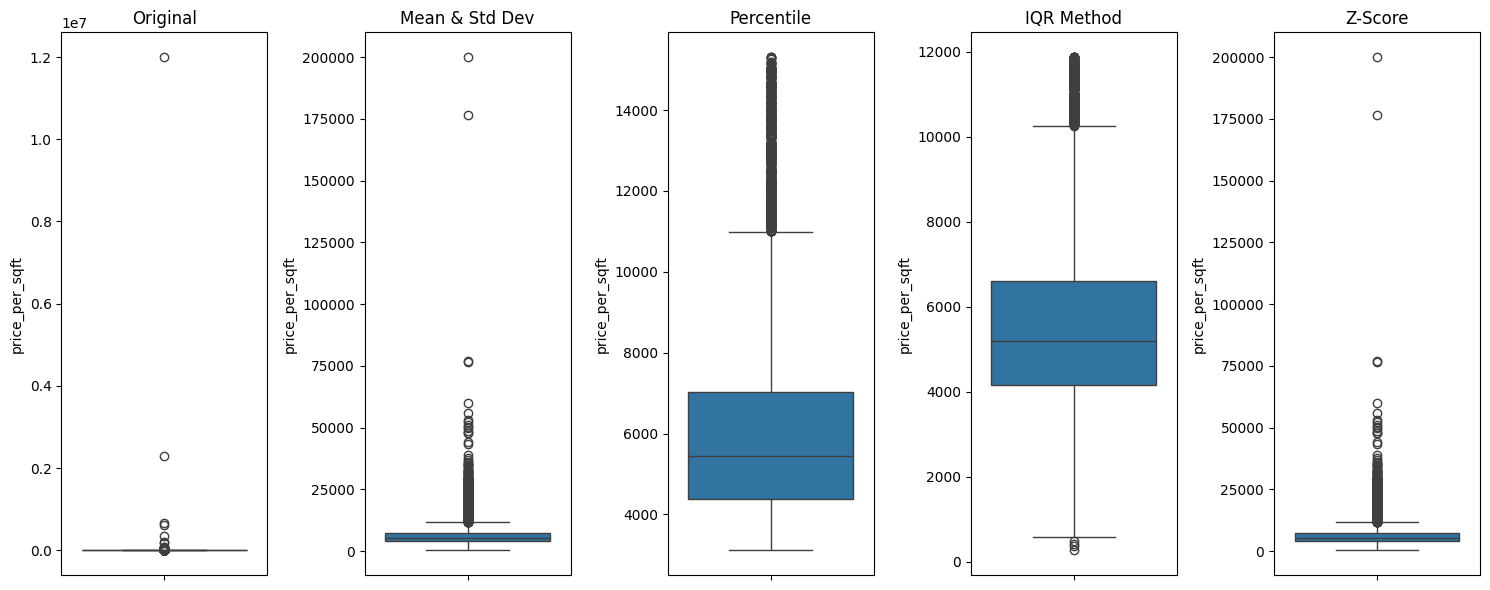

In [8]:
plt.figure(figsize=(15, 6))

# Original Data
plt.subplot(1, 5, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original')

# Mean & Std Dev
plt.subplot(1, 5, 2)
sns.boxplot(y=df_trimmed['price_per_sqft'])
plt.title('Mean & Std Dev')

# Percentile
plt.subplot(1, 5, 3)
sns.boxplot(y=df_percentile['price_per_sqft'])
plt.title('Percentile')

# IQR Method
plt.subplot(1, 5, 4)
sns.boxplot(y=df_iqr['price_per_sqft'])
plt.title('IQR Method')

# Z-Score
plt.subplot(1, 5, 5)
sns.boxplot(y=df_zscore['price_per_sqft'])
plt.title('Z-Score')

plt.tight_layout()
plt.show()

## 📈 **Q4: Histogram & Normality Check**

Skewness: 0.9445732298531184
Kurtosis: 0.6784399584501744


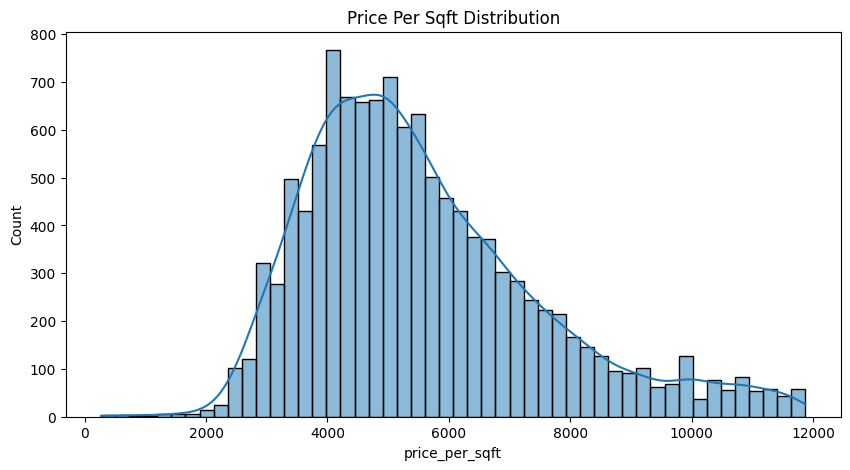

In [9]:
# Skewness & Kurtosis
skewness_value = skew(df_iqr["price_per_sqft"])
print(f"Skewness: {skewness_value}")
kurtosis_value = kurtosis(df_iqr["price_per_sqft"])
print(f"Kurtosis: {kurtosis_value}")

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df_iqr['price_per_sqft'], bins=50, kde=True)
plt.title('Price Per Sqft Distribution')
plt.show()

## 🔥 **Q5: Correlation Heatmap**

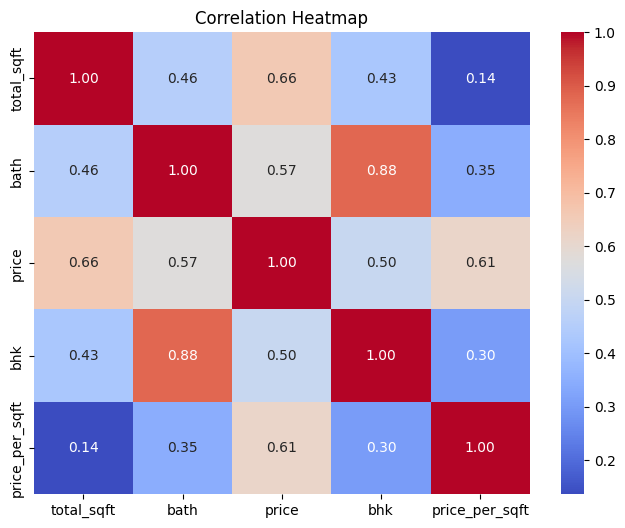

In [17]:
df_numeric = df_iqr.select_dtypes(include=[np.number])
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).dropna()
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 🌐 **Q6: Scatter Plots to Check Relationships**

In [ ]:
print(df_iqr.columns)

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


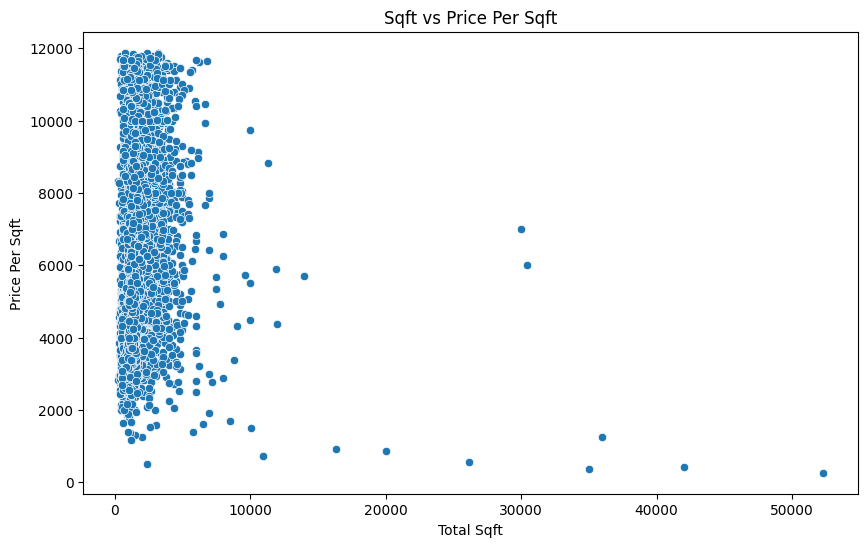

In [11]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_iqr['total_sqft'], y=df_iqr['price_per_sqft'])
plt.title('Sqft vs Price Per Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price Per Sqft')
plt.show()